In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import numpy as np
#labs=np.load('/content/gdrive/My Drive/DCMH_lab.npy')

In [0]:
#f=np.unique(labs,return_counts=True)[1]

In [0]:
lab_50=[]
k=0
for i in range(125):
  for j in range(50):
    lab_50.append(k)
  k=k+1
lab_50=np.asarray(lab_50)

In [0]:
lab_50

array([  0,   0,   0, ..., 124, 124, 124])

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.python.keras.layers import Dense,Flatten
from tensorflow.python.keras.models import Model
import numpy as np

In [0]:
class discriminator(tf.keras.Model):
  def __init__(self):
    super(discriminator, self).__init__()
    self.hidden_layer=Dense(4096,activation=tf.nn.relu)
    self.recon_output=Dense(1,activation=tf.nn.sigmoid)
  def forward(self,concat_content_style_img_skt):
    mid_layer=self.hidden_layer(concat_content_style_img_skt)
    return self.recon_output(mid_layer)

In [0]:
class generator(tf.keras.Model):
  def __init__(self):
    super(generator,self).__init__()
    self.middle_layer=Dense(250,activation=tf.nn.relu)
    self.output_layer=Dense(4096,activation=tf.nn.relu)
  def fwd(self,style_img,content_img):
    concat_=tf.concat([style_img,content_img],-1)
    mid_layer=self.middle_layer(concat_)
    return self.output_layer(mid_layer)

In [0]:
class Content_Encoder(tf.keras.Model):
  def __init__(self,encoded_dims_content):
    super(Content_Encoder, self).__init__()
    self.hidden_layer=Dense(4096,activation=tf.nn.relu)
    self.encoded_layer=Dense(encoded_dims_content,activation=tf.nn.relu)
  def forward(self,input_vec):
    middle_layer=self.hidden_layer(input_vec)
    return self.encoded_layer(middle_layer)

In [0]:
def discriminate_real( x_A, x_B):
  discriminator_=discriminator()
  real_A_logit = discriminator_.forward(x_A)
  real_B_logit = discriminator_.forward(x_B)

  return real_A_logit, real_B_logit

def discriminate_fake( x_ba, x_ab):
  discriminator_=discriminator()
  fake_A_logit = discriminator_.forward(x_ba)
  fake_B_logit = discriminator_.forward(x_ab)

  return fake_A_logit, fake_B_logit

In [0]:
class Style_Encoder(tf.keras.Model):
  def __init__(self,encoded_dims):
    super(Style_Encoder, self).__init__()
    self.hidden_layer=Dense(4096,activation=tf.nn.relu)
    self.encoded_layer=Dense(encoded_dims,activation=tf.nn.relu)
  def forward(self,input_vec):
    middle_layer=self.hidden_layer(input_vec)
    return self.encoded_layer(middle_layer)

# **Losses**

In [0]:
def discriminator_loss( real, fake):
    n_scale = real.get_shape()
    loss = []
    real_loss = 0
    fake_loss = 0
    for i in range(len(n_scale)) :
      real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(real[i]), logits=real[i]))
      fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(fake[i]), logits=fake[i]))
    loss.append(real_loss + fake_loss)
    return sum(loss)
def generator_loss( fake):
    n_scale = fake.get_shape()
    loss = []
    fake_loss = 0
    for i in range(len(n_scale)) :
      fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(fake[i]), logits=fake[i]))
    loss.append(fake_loss)
    return sum(loss)
def L1_loss(x, y):
    loss = tf.reduce_mean(tf.abs(x - y))

    return loss

In [0]:
def loss(model, original):
  reconstruction_error = tf.reduce_mean(tf.square(tf.subtract(model(original), original)))
  return reconstruction_error

In [0]:
style=Style_Encoder(125)
content=Content_Encoder(125)
gen=generator()

W0712 05:14:12.859168 139787141822336 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
#content.forward()

making objects

In [0]:
def Encoder_A( x_A):
    style_A = style.forward(x_A)
    content_A = content.forward(x_A)

    return content_A, style_A

def Encoder_B( x_B):
    style_B = style.forward(x_B)
    content_B = content.forward(x_B)

    return content_B, style_B

def Decoder_A(content_B, style_A):
    x_ba = gen.fwd(content_B, style_A)

    return x_ba

def Decoder_B(content_A, style_B):
    x_ab = gen.fwd(content_A, style_B)

    return x_ab

In [0]:
#domain_A=tf.placeholder(tf.float32,shape=[None,4096])
#domain_B=tf.placeholder(tf.float32,shape=[None,4096])

In [0]:
style_a = tf.placeholder(tf.float64, shape= [None,125], name='style_a')
style_b = tf.placeholder(tf.float64, shape=[None,125], name='style_b' )

In [0]:
####----------------------------------------importing dataset--------------------
import numpy as np
trainA_dataset=np.load('/content/gdrive/My Drive/imgs_50.npy')
trainB_dataset=np.load('/content/gdrive/My Drive/skts_50.npy')
final_imgs=[]
for i in range(trainA_dataset.shape[0]):
  for j in range(trainA_dataset.shape[1]):
    final_imgs.append(trainA_dataset[i][j])
    
final_imgs=np.asarray(final_imgs)
    
final_skts=[]
for i in range(trainB_dataset.shape[0]):
  for j in range(trainB_dataset.shape[1]):
    final_skts.append(trainB_dataset[i][j])
    
final_skts=np.asarray(final_skts)
    

trainA_dataset_=final_imgs
trainB_dataset_=final_skts


trainA_ = tf.data.Dataset.from_tensor_slices(trainA_dataset_).repeat().batch(64)
trainB_ = tf.data.Dataset.from_tensor_slices(trainB_dataset_).repeat().batch(64)

""" Image """
#batch_size=64
#trainA = trainA_.prefetch(batch_size)
#trainB = trainB_.prefetch(batch_size)

trainA_iterator = trainA_.make_one_shot_iterator()
trainB_iterator = trainB_.make_one_shot_iterator()

domain_A = trainA_iterator.get_next()
domain_B = trainB_iterator.get_next()


W0712 05:14:20.389306 139787141822336 deprecation.py:323] From <ipython-input-21-ad3e3fb6d371>:31: DatasetV1.make_one_shot_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


In [0]:
content_a, style_a_prime = Encoder_A(domain_A)
content_b, style_b_prime = Encoder_B(domain_B)

# decode (within domain)
x_aa = Decoder_A(content_B=content_a, style_A=style_a_prime)
x_bb = Decoder_B(content_A=content_b, style_B=style_b_prime)

# decode (cross domain)
x_ba = Decoder_A(content_B=content_b, style_A=style_a)
x_ab = Decoder_B(content_A=content_a, style_B=style_b)

# encode again
content_b_, style_a_ = Encoder_A(x_ba)
content_a_, style_b_ = Encoder_B(x_ab)

In [0]:
#gen.fwd(content_a, style_a_prime)

In [0]:
#real_A_logit, real_B_logit = discriminate_real(domain_A, domain_B)

In [0]:
real_A_logit, real_B_logit = discriminate_real(trainA_iterator.get_next(), trainB_iterator.get_next())
fake_A_logit, fake_B_logit = discriminate_fake(x_ba, x_ab)

""" Define Loss """
G_ad_loss_a = generator_loss(fake_A_logit)
G_ad_loss_b = generator_loss( fake_B_logit)

D_ad_loss_a = discriminator_loss( real_A_logit, fake_A_logit)
D_ad_loss_b = discriminator_loss( real_B_logit, fake_B_logit)

recon_A = L1_loss(x_aa, trainA_iterator.get_next()) # reconstruction
recon_B = L1_loss(x_bb, trainB_iterator.get_next()) # reconstruction

# The style reconstruction loss encourages
# diverse outputs given different style codes
recon_style_A = L1_loss(style_a_, style_a)
recon_style_B = L1_loss(style_b_, style_b)


# The content reconstruction loss encourages
# the translated image to preserve semantic content of the input image
recon_content_A = L1_loss(content_a_, content_a)
recon_content_B = L1_loss(content_b_, content_b)

W0712 05:14:23.794178 139787141822336 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
Gen_A_Loss= G_ad_loss_a +  recon_A + recon_style_A + recon_content_A #+  cyc_recon_A
Gen_B_loss= G_ad_loss_b + recon_B + recon_style_B + recon_content_B #+  cyc_recon_B

In [0]:
Discriminator_A_loss =D_ad_loss_a
Discriminator_B_loss =D_ad_loss_b

In [0]:
Generator_loss = Gen_A_Loss + Gen_B_loss
Discriminator_loss = Discriminator_A_loss + Discriminator_B_loss

In [0]:
x=tf.trainable_variables()

In [0]:
G_Var=x[0:12]
D_Var=x[12:]

In [0]:
x

[<tf.Variable 'dense/kernel:0' shape=(4096, 4096) dtype=float64>,
 <tf.Variable 'dense/bias:0' shape=(4096,) dtype=float64>,
 <tf.Variable 'dense_1/kernel:0' shape=(4096, 125) dtype=float64>,
 <tf.Variable 'dense_1/bias:0' shape=(125,) dtype=float64>,
 <tf.Variable 'dense_2/kernel:0' shape=(4096, 4096) dtype=float64>,
 <tf.Variable 'dense_2/bias:0' shape=(4096,) dtype=float64>,
 <tf.Variable 'dense_3/kernel:0' shape=(4096, 125) dtype=float64>,
 <tf.Variable 'dense_3/bias:0' shape=(125,) dtype=float64>,
 <tf.Variable 'dense_4_1/kernel:0' shape=(250, 250) dtype=float64>,
 <tf.Variable 'dense_4_1/bias:0' shape=(250,) dtype=float64>,
 <tf.Variable 'dense_5/kernel:0' shape=(250, 4096) dtype=float64>,
 <tf.Variable 'dense_5/bias:0' shape=(4096,) dtype=float64>,
 <tf.Variable 'dense_6_1/kernel:0' shape=(4096, 4096) dtype=float64>,
 <tf.Variable 'dense_6_1/bias:0' shape=(4096,) dtype=float64>,
 <tf.Variable 'dense_7_1/kernel:0' shape=(4096, 1) dtype=float64>,
 <tf.Variable 'dense_7_1/bias:0' s

In [0]:
#for i in x:
#  print(i.trainable)
G_Var

[<tf.Variable 'dense/kernel:0' shape=(4096, 4096) dtype=float64>,
 <tf.Variable 'dense/bias:0' shape=(4096,) dtype=float64>,
 <tf.Variable 'dense_1/kernel:0' shape=(4096, 125) dtype=float64>,
 <tf.Variable 'dense_1/bias:0' shape=(125,) dtype=float64>,
 <tf.Variable 'dense_2/kernel:0' shape=(4096, 4096) dtype=float64>,
 <tf.Variable 'dense_2/bias:0' shape=(4096,) dtype=float64>,
 <tf.Variable 'dense_3/kernel:0' shape=(4096, 125) dtype=float64>,
 <tf.Variable 'dense_3/bias:0' shape=(125,) dtype=float64>,
 <tf.Variable 'dense_4_1/kernel:0' shape=(250, 250) dtype=float64>,
 <tf.Variable 'dense_4_1/bias:0' shape=(250,) dtype=float64>,
 <tf.Variable 'dense_5/kernel:0' shape=(250, 4096) dtype=float64>,
 <tf.Variable 'dense_5/bias:0' shape=(4096,) dtype=float64>]

In [0]:
D_Var

[<tf.Variable 'dense_6_1/kernel:0' shape=(4096, 4096) dtype=float64>,
 <tf.Variable 'dense_6_1/bias:0' shape=(4096,) dtype=float64>,
 <tf.Variable 'dense_7_1/kernel:0' shape=(4096, 1) dtype=float64>,
 <tf.Variable 'dense_7_1/bias:0' shape=(1,) dtype=float64>,
 <tf.Variable 'dense_8/kernel:0' shape=(4096, 4096) dtype=float64>,
 <tf.Variable 'dense_8/bias:0' shape=(4096,) dtype=float64>,
 <tf.Variable 'dense_9/kernel:0' shape=(4096, 1) dtype=float64>,
 <tf.Variable 'dense_9/bias:0' shape=(1,) dtype=float64>]

In [0]:
lr=tf.placeholder(tf.float32,name='learning_rate')

In [0]:
#G_optim = tf.train.AdamOptimizer(lr, beta1=0.5, beta2=0.999).minimize(Generator_loss, var_list=G_Var)
D_optim = tf.train.AdamOptimizer(lr, beta1=0.5, beta2=0.999).minimize(Discriminator_loss, var_list=D_Var)

In [0]:
G_optim = tf.train.AdamOptimizer(lr, beta1=0.5, beta2=0.999).minimize(Generator_loss, var_list=G_Var)

In [0]:
all_G_loss = tf.summary.scalar("Generator_loss", Generator_loss)
all_D_loss = tf.summary.scalar("Discriminator_loss", Discriminator_loss)
G_A_loss = tf.summary.scalar("G_A_loss", Gen_A_Loss)
G_B_loss = tf.summary.scalar("G_B_loss", Gen_B_loss)
D_A_loss = tf.summary.scalar("D_A_loss", Discriminator_A_loss)
D_B_loss = tf.summary.scalar("D_B_loss", Discriminator_B_loss)

G_loss = tf.summary.merge([G_A_loss, G_B_loss, all_G_loss])
D_loss = tf.summary.merge([D_A_loss, D_B_loss, all_D_loss])

In [0]:
x_ba

<tf.Tensor 'dense_5_2/Relu:0' shape=(?, 4096) dtype=float64>

In [0]:
""" Image """
#fake_A = tf.convert_to_tensor(x_ba, dtype=tf.float64)
#fake_B = tf.convert_to_tensor(x_ab, dtype=tf.float64)

#real_A =domain_A
#real_B =domain_B

' Image '

In [0]:
'''#######""" Guided Image Translation """
content_image = tf.placeholder(tf.float32, [1, 4096], name='content_image')
style_image = tf.placeholder(tf.float32, [1, 4096], name='guide_style_image')

if direction == 'a2b' :
    guide_content_A, guide_style_A = self.Encoder_A(self.content_image, reuse=True)
    guide_content_B, guide_style_B = self.Encoder_B(self.style_image, reuse=True)

else :
    guide_content_B, guide_style_B = self.Encoder_B(self.content_image, reuse=True)
    guide_content_A, guide_style_A = self.Encoder_A(self.style_image, reuse=True)

guide_fake_A = Decoder_A(content_B=guide_content_B, style_A=guide_style_A, reuse=True)
guide_fake_B = Decoder_B(content_A=guide_content_A, style_B=guide_style_B, reuse=True)
'''

'#######""" Guided Image Translation """\ncontent_image = tf.placeholder(tf.float32, [1, 4096], name=\'content_image\')\nstyle_image = tf.placeholder(tf.float32, [1, 4096], name=\'guide_style_image\')\n\nif direction == \'a2b\' :\n    guide_content_A, guide_style_A = self.Encoder_A(self.content_image, reuse=True)\n    guide_content_B, guide_style_B = self.Encoder_B(self.style_image, reuse=True)\n\nelse :\n    guide_content_B, guide_style_B = self.Encoder_B(self.content_image, reuse=True)\n    guide_content_A, guide_style_A = self.Encoder_A(self.style_image, reuse=True)\n\nguide_fake_A = Decoder_A(content_B=guide_content_B, style_A=guide_style_A, reuse=True)\nguide_fake_B = Decoder_B(content_A=guide_content_A, style_B=guide_style_B, reuse=True)\n'

In [0]:
sess=tf.Session()

In [0]:
import time

In [0]:
output=tf.placeholder(tf.float32, [None, 4096])

In [0]:
#from tensorflow.python.keras.models import load_model
#vgg=load_weights('/content/gdrive/My Drive/image_best_model.h5',compile=True)

In [0]:
#vgg.summary()

In [0]:
#style_a = tf.placeholder(tf.float32, shape= [None, 1, 1, 125], name='style_a')
#style_b = tf.placeholder(tf.float32, shape=[None, 1, 1, 125], name='style_b' )

In [0]:
with sess.as_default():
  # initialize all variables
  tf.global_variables_initializer().run()
  
  #trainA_dataset_=np.load('/content/gdrive/My Drive/DCMH_imgs.npy')
  # saver to save model
  #self.saver = tf.train.Saver()

  # summary writer
  #self.writer = tf.summary.FileWriter(self.log_dir + '/' + self.model_dir, self.sess.graph)

  # restore check-point if it exits
  #could_load, checkpoint_counter = self.load(self.checkpoint_dir)
  #if could_load:
  #  start_epoch = (int)(checkpoint_counter / self.iteration)
  #  start_batch_id = checkpoint_counter - start_epoch * self.iteration
  #  counter = checkpoint_counter
  #  print(" [*] Load SUCCESS")
  #else:
  epoch_d_loss=0
  epoch_g_loss=0
  start_epoch = 0
  start_batch_id = 0
  counter = 1
  iteration=round(6250/64)
  batch_size=64
  style_dim=125
  epoch=29
  #print(" [!] Load failed...")

  # loop for epoch
  start_time = time.time()
  ans=[]
  ans_skt=[]
  for epoch in range(start_epoch, epoch):


    for idx in range(start_batch_id, iteration):
        style_a_new = np.random.normal(loc=0.0, scale=1.0, size=[batch_size, style_dim])
        style_b_new = np.random.normal(loc=0.0, scale=1.0, size=[batch_size, style_dim])
        #style_a_new=tf.random_normal([batch_size, 1, 1, style_dim],mean=0.0,stddev=1.0,dtype=tf.float32,seed=None,name=None)
        #style_b_new=tf.random_normal([batch_size, 1, 1, style_dim],mean=0.0,stddev=1.0,dtype=tf.float32,seed=None,name=None)
        domain_A=trainA_iterator.get_next()
        domain_B=trainB_iterator.get_next()
        train_feed_dict = {style_a : style_a_new,style_b : style_b_new,lr : lr}

        # Update D  
        _, d_loss, summary_str = sess.run([D_optim, Discriminator_loss, D_loss], feed_dict = {style_a : style_a_new,style_b : style_b_new,lr : 1e-7})
          #self.writer.add_summary(summary_str, counter)

          # Update G
        batch_A_images, batch_B_images, fake_A, fake_B, _, g_loss, summary_str = sess.run([domain_A,domain_B, tf.convert_to_tensor(x_ba, dtype=tf.float64)
                                                                                             , tf.convert_to_tensor(x_ab, dtype=tf.float64), G_optim, Generator_loss, G_loss]
                                                                                            , feed_dict = {style_a : style_a_new,style_b : style_b_new,
                                                                                                           lr : 1e-7})
        #self.writer.add_summary(summary_str, counter)
        # display training status
        counter += 1
        #print("Epoch: [%2d] [%6d/%6d] time: %4.4f d_loss: %.8f, g_loss: %.8f" \
        #% (epoch, idx, iteration, time.time() - start_time, d_loss, g_loss))
        
        if epoch == 28:
          ans_skt.append(fake_B)
        
        
        epoch_d_loss=epoch_d_loss+d_loss
        epoch_g_loss=epoch_g_loss+g_loss
        #if np.mod(idx+1, self.print_freq) == 0 :
        #    save_images(batch_A_imaA_{:02d}_{:06d}.jpg'.format(self.sample_dir, epoch, idx+1))
            # save_images(batch_B_images, [self.batch_size, 1],
            #             './{}/realges, [self.batch_size, 1],
        #                './{}/real__B_{}_{:02d}_{:06d}.jpg'.format(self.sample_dir, gpu_id, epoch, idx+1))

            # save_images(fake_A, [self.batch_size, 1],
            #             './{}/fake_A_{}_{:02d}_{:06d}.jpg'.format(self.sample_dir, gpu_id, epoch, idx+1))
        #    save_images(fake_B, [self.batch_size, 1],
        #                './{}/fake_B_{:02d}_{:06d}.jpg'.format(self.sample_dir, epoch, idx+1))

        #if np.mod(idx+1, self.save_freq) == 0 :
        #    self.save(self.checkpoint_dir, counter)
    print("Epoch: [%2d] time: %4.4f d_loss: %.8f, g_loss: %.8f" \
    % (epoch, time.time() - start_time, epoch_d_loss, epoch_g_loss))
    epoch_d_loss=0
    epoch_g_loss=0
    # After an epoch, start_batch_id is set to zero
    # non-zero value is only for the first epoch after loading pre-trained model
    start_batch_id = 0

    # save model for final step
    #self.save(self.checkpoint_dir, counter)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/iterator_ops.py:420: UserWarning: An unusually high number of `Iterator.get_next()` calls was detected. This often indicates that `Iterator.get_next()` is being called inside a training loop, which will cause gradual slowdown and eventual resource exhaustion. If this is the case, restructure your code to call `next_element = iterator.get_next()` once outside the loop, and use `next_element` as the input to some computation that is invoked inside the loop.
  warnings.warn(GET_NEXT_CALL_WARNING_MESSAGE)


Epoch: [ 0] time: 413.4348 d_loss: 270.50339256, g_loss: 443.22221807
Epoch: [ 1] time: 818.1481 d_loss: 265.09842517, g_loss: 437.82754994
Epoch: [ 2] time: 1220.8219 d_loss: 261.65121343, g_loss: 434.06026776
Epoch: [ 3] time: 1628.4243 d_loss: 256.31075240, g_loss: 429.40380114
Epoch: [ 4] time: 2043.0225 d_loss: 253.64242164, g_loss: 425.54114494
Epoch: [ 5] time: 2451.8543 d_loss: 249.05854251, g_loss: 422.88165308
Epoch: [ 6] time: 2868.7724 d_loss: 247.07902757, g_loss: 418.52990386
Epoch: [ 7] time: 3282.5779 d_loss: 244.24379905, g_loss: 414.91462718
Epoch: [ 8] time: 3686.0199 d_loss: 242.78410835, g_loss: 412.64509485
Epoch: [ 9] time: 4092.7765 d_loss: 240.46308597, g_loss: 409.46028155
Epoch: [10] time: 4501.1421 d_loss: 238.61859079, g_loss: 406.49560380
Epoch: [11] time: 4907.8473 d_loss: 236.11492115, g_loss: 404.61301984
Epoch: [12] time: 5314.5890 d_loss: 235.19838373, g_loss: 401.45794326
Epoch: [13] time: 5731.6501 d_loss: 233.35502813, g_loss: 399.05354087
Epoch: [

In [0]:
ans_skt=np.asarray(ans_skt)

In [0]:
x_train_skt=[]
for i in range(98):
  for j in range(64):
    x_train_skt.append(ans_skt[i][j])
x_train_skt=np.asarray(x_train_skt)

In [0]:
x_train_skt=x_train_skt[:6250]

In [0]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,random_state=0)

In [0]:
final=tsne.fit_transform(x_train_skt)

In [0]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(16, 16))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    #txts = []

    #for i in range(num_classes):

        # Position of each label at median of data points.

        #xtext, ytext = np.median(x[colors == i, :], axis=0)
        #txt = ax.text(xtext, ytext, str(i), fontsize=24)
        #txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"),PathEffects.Normal()])
        #txts.append(txt)

    return f, ax, sc

(<Figure size 1152x1152 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x7f1626042ef0>)

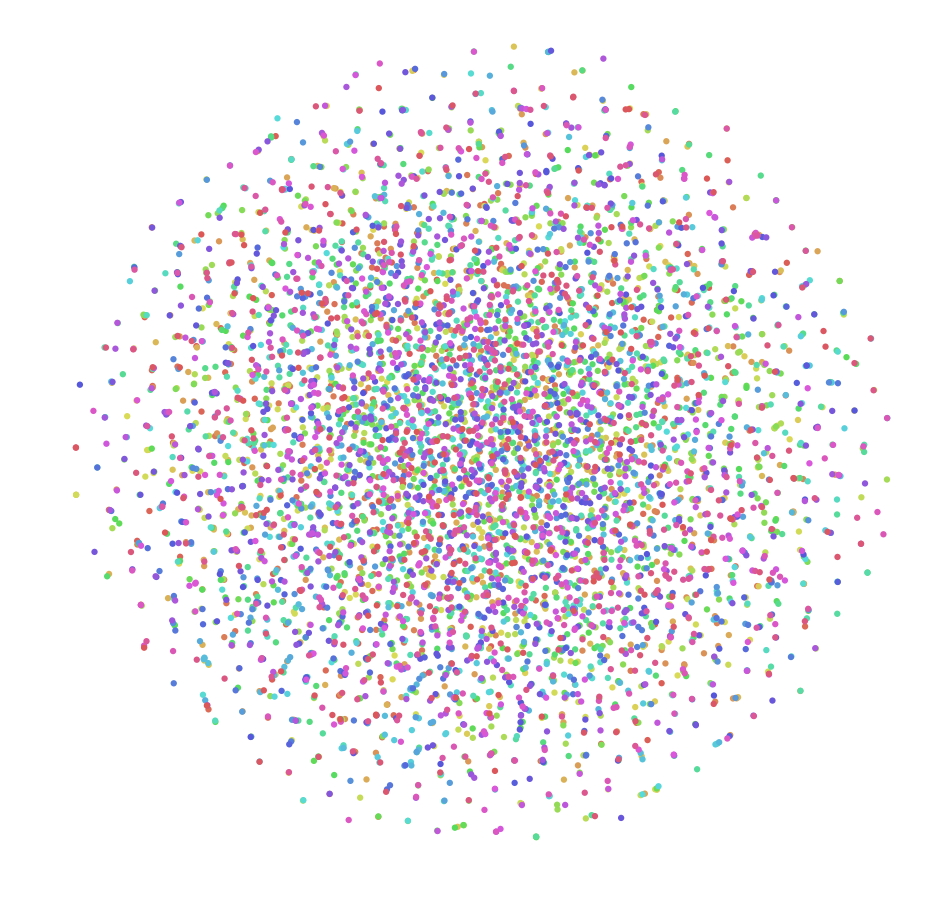

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as PathEffects
fashion_scatter(final,lab_50) #Visualizing the PCA output
#plt.plot(final)

In [0]:
def fashion_scatter_(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(16, 16))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"),PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 1152x1152 with 1 Axes>,
 [Text(-0.5931225, 0.50784194, '0'),
  Text(1.6389726, 3.8242812, '1'),
  Text(-0.19654088, 1.5376468, '2'),
  Text(0.68702483, 1.4258821, '3'),
  Text(-3.0259733, 2.0928972, '4'),
  Text(-0.7189849, 0.09136602, '5'),
  Text(-0.5061666, -0.54342085, '6'),
  Text(2.5513706, -0.6616324, '7'),
  Text(-0.61428666, 1.6216817, '8'),
  Text(0.97585624, -2.5444078, '9'),
  Text(-1.1318028, 0.6723958, '10'),
  Text(2.9038196, 1.7074896, '11'),
  Text(1.9275252, -1.3840489, '12'),
  Text(-0.29150155, -0.18095887, '13'),
  Text(0.2492144, 0.49710545, '14'),
  Text(0.4359458, 0.26440272, '15'),
  Text(0.32263345, -1.4669588, '16'),
  Text(1.6540318, -1.5713311, '17'),
  Text(2.326764, -2.3116035, '18'),
  Text(0.9331102, 0.6242897, '19'),
  Text(0.49470994, 1.3350674, '20'),
  Text(-1.6908786, -2.512497, '21'),
  Text(1.8774873, -0.25652882, '22'),
  Text(2.3212287, -0.7693424, '23'),
  Text(1.6953101, -1.3211035, '24'),
  Text(-0.0766055, 1.2267301, '25'),
  

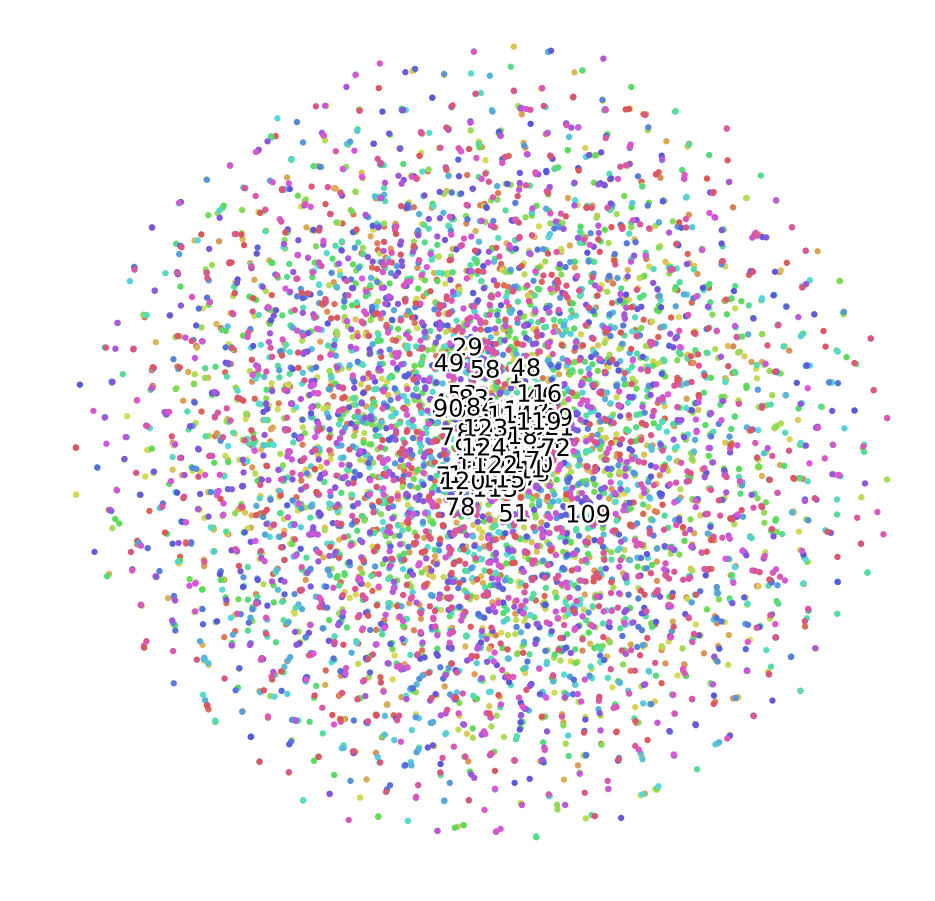

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as PathEffects
fashion_scatter_(final,lab_50)

In [0]:
np.save('/content/gdrive/My Drive/Syntetic Images.npy',ans_imgs)

In [0]:
from tensorflow.python.keras.models import load_model
vgg=load_model('/content/gdrive/My Drive/image_best_model.h5',compile=True)

W0710 05:48:34.382371 140194532784000 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0710 05:48:34.384445 140194532784000 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0710 05:48:34.385864 140194532784000 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtyp

In [0]:
#from google.colab import drive
#drive.mount()
import keras
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.layers import Dense,Flatten,Dropout
from tensorflow.python.keras import Model

Using TensorFlow backend.


In [0]:
vgg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 4096)              134260544 
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 125)               512125    
Total params: 134,772,669
Trainable params: 134,772,669
Non-trainable params: 0
_________________________________________________________________


In [0]:
import numpy as np
k=np.asarray(vgg.get_weights())

In [0]:
t=vgg.get_weights()[28:]

In [0]:
abcd_model=Sequential()
abcd_model.add(Dense(4096))
abcd_model.add(Dense(125,activation='softmax'))
abcd_model.build([None,4096])

In [0]:
abcd_model.set_weights(t)

In [0]:
syn_img=np.load('/content/gdrive/My Drive/Syntetic Images.npy')

In [0]:
pred=abcd_model.predict(syn_img)

In [0]:
pred[3][39]

0.068252005

In [0]:
pred_lab=[]
for i in pred:
  pred_lab.append(np.argmax(i))

In [0]:
pred_lab=np.asarray(pred_lab)

In [0]:
pred_lab.shape

(6250,)

In [0]:
np.unique(pred_lab,return_counts=True)

(array([39]), array([6250]))

In [0]:
#import tensorflow as tf
from tensorflow.python.keras.applications import VGG16
temp_model=VGG16(include_top=True,weights='imagenet')0

ImportError: ignored

In [0]:
acuracy_score